# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [27]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [28]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [29]:
# word net installation:

# unmark if you want to use and need to install
 #!pip install wn
 #!python -m wn download omw-he:1.4

In [30]:
# word net import:

# unmark if you want to use:
 #import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [31]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [32]:
# Hebrew tokenizer import:

# unmark if you want to use:
#import hebrew_tokenizer as ht
#extra import 
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedKFold
from statistics import mean
import matplotlib.pyplot as pyplot

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [33]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [34]:
df_train.head(8)
df_train.shape
df_train['gender'].value_counts()

print("test")
x=5
np.std(x)

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

m    575
f    178
Name: gender, dtype: int64

test


0.0

In [35]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [36]:
def clean_text(text):
    # Remove numbers , spaces and leading and trailing spaces using regular expression library
    text = re.sub(r'\d+', '', text) #removes numbers
    text = re.sub(r'[^\w\s]', '', text) #removes non-alphanumeric characters and whitespace
    text = re.sub(r'\s+', ' ', text) #replaces consecutive whitespaces with a single space
    text = text.strip() #rest of the clean up
    return text

def set_up(vectorizer = 'TfidfVectorizer' , ngram_range = (1,1) ,min_df = 5 , k =1000 , test = False ):
    if test:
        #this sets up text vectorization using tfidvectorizer. applies clean text applies feature selection using selectkbest and scales them with minmax
        #it returns the story and a scaled feature matrix
        test_filename = 'corpus_for_test.csv'
        df = pd.read_csv(test_filename, index_col=None, encoding='utf-8')
        df['story'] = df['story'].apply(clean_text)
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range)

        X_test = df['story']
        X_test_vect = vectorizer.fit_transform(X_test)
        selector = SelectKBest(mutual_info_classif, k=k)
    
        X_test_selected = selector.fit_transform(X_test_vect, np.zeros(X_test_vect.shape[0]))

        scaler = MinMaxScaler()

        X_test_scaled = scaler.fit_transform(X_test_selected.toarray())
        return df['story'], X_test_scaled
    
    #same as above but returns the scaled training and testing data and also the original
        
    train_filename = 'annotated_corpus_for_train.csv'
    df = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
        
    df['story'] = df['story'].apply(clean_text)
    
    X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF  
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df= min_df ,ngram_range= ngram_range)
    
    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df= min_df)
        
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    # Perform feature selection using mutual information
    selector = SelectKBest(mutual_info_classif, k=k) # chi2 # mutual_info_classif
    selector.fit(X_train_vect, y_train)

    # Apply feature selection to the vectorized data
    X_train_selected = selector.transform(X_train_vect)
    X_test_selected = selector.transform(X_test_vect)
    
    scaler = MinMaxScaler()
    
    X_train_scaled = scaler.fit_transform(X_train_selected.toarray())
    X_test_scaled = scaler.transform(X_test_selected.toarray())
    
    return X_train_scaled , X_test_scaled , X_train, X_test, y_train, y_test


Tuning lr
Tuning knn
Tuning cart
Tuning svm
Tuning LinearSVC
Tuning MLPClassifier
Tuning Perceptron
Tuning SGDClassifier
LogisticRegression(C=1)
>lr Accuracy: 0.759 (0.094)
F1 Score (female): 0.444
F1 Score (male): 0.879
F1 Score **(average_f1)**: 0.662



KNeighborsClassifier(weights='distance')
>knn Accuracy: 0.753 (0.091)
F1 Score (female): 0.000
F1 Score (male): 0.860
F1 Score **(average_f1)**: 0.430



DecisionTreeClassifier(criterion='entropy', max_depth=3)
>cart Accuracy: 0.677 (0.102)
F1 Score (female): 0.423
F1 Score (male): 0.880
F1 Score **(average_f1)**: 0.652



SVC(C=0.1, kernel='linear')
>svm Accuracy: 0.766 (0.097)
F1 Score (female): 0.456
F1 Score (male): 0.873
F1 Score **(average_f1)**: 0.665



LinearSVC(C=1, dual=False)
>LinearSVC Accuracy: 0.771 (0.094)
F1 Score (female): 0.478
F1 Score (male): 0.851
F1 Score **(average_f1)**: 0.664



MLPClassifier(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive')
>MLPClassifier Accuracy: 0.744 (0.103)
F1 Score (female):

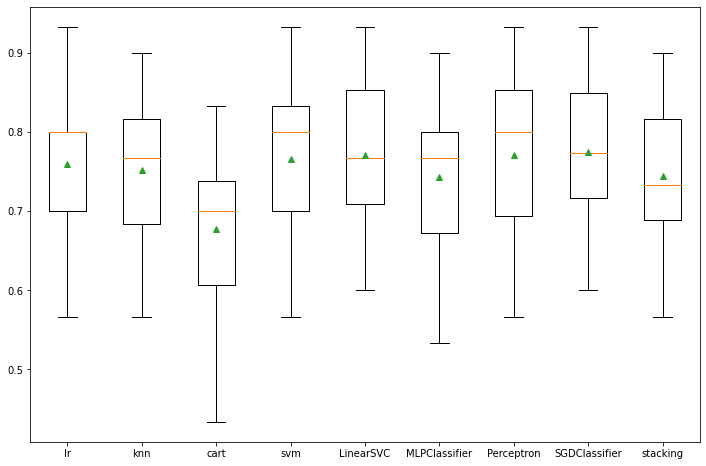

In [37]:
def get_models(params):
    #creating and return a dictionary of machine learning models
    #this code provides a convenient way to create and store multiple machine learning models with their respective hyperparameters
    models = dict()
    models['lr'] = LogisticRegression(**params['lr'])
    models['knn'] = KNeighborsClassifier(**params['knn'])
    models['cart'] = DecisionTreeClassifier(**params['cart'])
    models['svm'] = SVC(**params['svm'])
    models['LinearSVC'] = LinearSVC(**params['LinearSVC'])
    models['MLPClassifier'] = MLPClassifier(**params['MLPClassifier'])
    models['Perceptron'] = Perceptron(**params['Perceptron'])
    models['SGDClassifier'] = SGDClassifier(**params['SGDClassifier']) 
    models['stacking'] = get_stacking(params)
    return models

# figuring out the best model to use
def get_stacking(params):
    # I used BaggingClassifier which proved to give the best results
    #The stacking ensemble consists of multiple base classifiers, which are trained on the original data, and a meta-classifier
    #which combines the predictions of the base classifiers to make the final prediction.
    lvl0 = []
    lvl0.append(('lr_bagging', BaggingClassifier(base_estimator=LogisticRegression(**params['lr']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('knn_bagging', BaggingClassifier(base_estimator=KNeighborsClassifier(**params['knn']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('cart_bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(**params['cart']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('svm_bagging', BaggingClassifier(base_estimator=SVC(**params['svm']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('LinearSVC_bagging', BaggingClassifier(base_estimator=LinearSVC(**params['LinearSVC']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('SGDClassifier_bagging', BaggingClassifier(base_estimator=SGDClassifier(**params['SGDClassifier']), n_estimators=100, max_samples=0.8, oob_score=False)))
    lvl0.append(('MLPClassifier', MLPClassifier(**params['MLPClassifier'])))
    lvl0.append(('Perceptron', Perceptron(**params['Perceptron'])))
    
    lvl1 = LogisticRegression(**params['lr'])
    model = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=5)
    return model 

def find_best_params(models , X_train_selected ,y_train ):
    #this function performs hyperparameter tuning for the given models using grid search cross-validation.
    #It returns a dictionary best_params containing the best hyperparameters found for each model.
    best_params = {}
    for n, m in models.items():
        print("Tuning", n)
        clf = GridSearchCV(m, params[n], cv=5, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[n] = clf.best_params_
        
    return best_params

# evaluate each model using cross-validation and diffrent params 
def evaluate_model(model,X_train_selected, X_test_selected  ,y_train, y_test):
    model_train = model.fit(X_train_selected , y_train)

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1  )

    y_pred = model_train.predict(X_test_selected)
    print(model_train)
    
    f1_male = f1_score(y_test, y_pred, pos_label='m')
    f1_female = f1_score(y_test, y_pred, pos_label='f')
    average_f1=(f1_male + f1_female)/2
    
    conf_mat = confusion_matrix(y_test, y_pred)

    return {'Accuracy': {'mean': mean(scores),'std': np.std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores':scores ,
            'y_pred':y_pred,
            'average_f1':average_f1,
            'model':model_train}


#params dictionary defines hyperparameter grids for each model
params = {'lr': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
          'knn': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
          'cart': {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']},
          'svm': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
          'LinearSVC': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'dual': [False]},
          'MLPClassifier': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                            'activation': ['tanh', 'relu'],
                            'solver': ['sgd', 'adam'],
                            'alpha': [0.0001, 0.05],
                            'learning_rate': ['constant','adaptive']},
          'Perceptron': {'alpha': [0.0001, 0.05], 'penalty': [None, 'l2', 'l1', 'elasticnet']},
          'SGDClassifier': {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                            'penalty': ['l2', 'l1', 'elasticnet'],
                            'alpha': [0.0001, 0.05]} }


#this defines the base models for each algorithm
models_list = {'lr': LogisticRegression(),
            'knn': KNeighborsClassifier(),
            'cart': DecisionTreeClassifier(),
            'svm': SVC(),
            'LinearSVC':LinearSVC(),
            'MLPClassifier':MLPClassifier(),
            'Perceptron':Perceptron(),
            'SGDClassifier':SGDClassifier()}
#now we obtain selected features and train test data splits

X_train_selected , X_test_selected , X_train, X_test, y_train, y_test = set_up(ngram_range = (1,1)) 

#was testing out good params but the best method turned out to be using best_params function
#finding out best params
best_params = find_best_params(models_list , X_train_selected ,y_train ) 


#uses the previously coded get models to create a dictionary of the final models with the best params
models = get_models(best_params) 
conf_mat = []

# evaluate the models and store results
results, names = list(), list()
y_pred = []
score = {}
for name, model in models.items():
    scores = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    results.append(scores['scores'])
    names.append(name)
    score[name] = scores
    y_pred.append(scores['y_pred'])
    print('>%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std']))
    print('F1 Score (female): %.3f' % (scores['F1 Score (female)']))
    print('F1 Score (male): %.3f' % (scores['F1 Score (male)']))
    print('F1 Score **(average_f1)**: %.3f\n\n\n' % (scores['average_f1']))
    
    
# plot model performance for comparison
def resulst_plot(results , names):
    pyplot.figure(figsize=(12,8))
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()
    
resulst_plot(results , names)


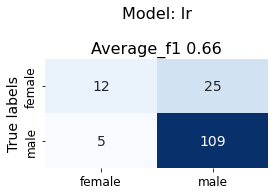

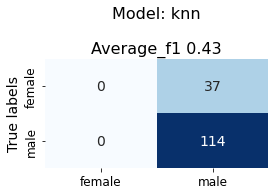

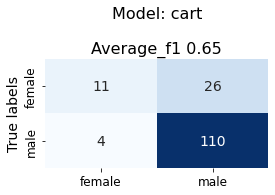

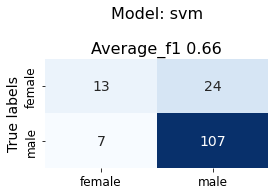

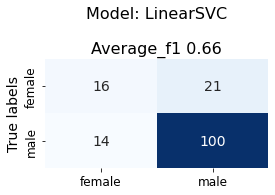

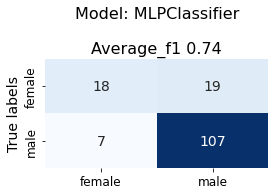

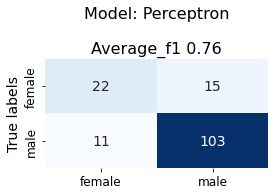

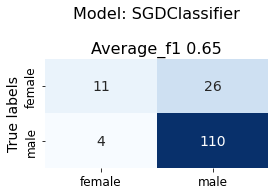

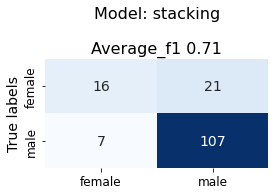

In [38]:
def plot_confusion_matrix(score):
    #plots each model and its accuracy for showcasing pictures/performance
    for mod in score:
        fig, ax = plt.subplots(figsize=(4, 2))

        sns.heatmap(score[mod]['Confusion Matrix'], annot=True, fmt='g', cmap='Blues', cbar=False,
                            annot_kws={'fontsize': 14}, ax=ax)
        #     ax.set_xlabel('Predicted labels', fontsize=14)
        ax.set_ylabel('True labels', fontsize=14)
        ax.set_xticklabels(['female', 'male'], fontsize=12)
        ax.set_yticklabels(['female', 'male'], fontsize=12)
        ax.set_title(f"Model: {mod}\n\nAverage_f1 {score[mod]['average_f1']:.2f}", fontsize=16)
        plt.show()
        
plot_confusion_matrix(score)

In [39]:
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')


In [40]:
data , test_data = set_up(test =True)
#printing out the predicted gender for each model
def predict_test_data(score):
    df_predict_dict = {}
    for mod in score:
        y_pred = score[mod]['model'].predict(test_data)
        df_predict = pd.DataFrame({'story': data, 'predicted gender': y_pred})
        print(f"-----Model {mod}------")
        print(df_predict['predicted gender'].value_counts())
        print("\n")
        df_predict_dict[mod] = df_predict
    return df_predict_dict

        
df_predict_dict = predict_test_data(score)
df_predicted = df_predict_dict['stacking']

-----Model lr------
m    275
f     48
Name: predicted gender, dtype: int64


-----Model knn------
m    323
Name: predicted gender, dtype: int64


-----Model cart------
m    286
f     37
Name: predicted gender, dtype: int64


-----Model svm------
m    291
f     32
Name: predicted gender, dtype: int64


-----Model LinearSVC------
m    187
f    136
Name: predicted gender, dtype: int64


-----Model MLPClassifier------
m    182
f    141
Name: predicted gender, dtype: int64


-----Model Perceptron------
m    187
f    136
Name: predicted gender, dtype: int64


-----Model SGDClassifier------
m    310
f     13
Name: predicted gender, dtype: int64


-----Model stacking------
m    236
f     87
Name: predicted gender, dtype: int64




### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [41]:
df_predicted.to_csv('classification_results.csv',index=False)